# Assignment 1

First we need to import a few modules, execute the cell below:

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline


Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [4]:
def f(x):
    return numpy.cos(x);

   

You can use the following cell to check that your code works for scalar arguments:

In [5]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [6]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [7]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    return - (numpy.sin(x));


In [8]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [9]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [10]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    return (f(x)-f(x-dx))/dx;


In [11]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


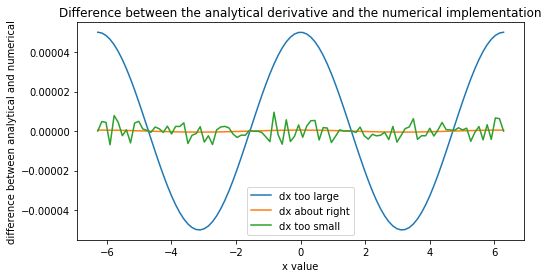

In [61]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-11)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical, label="dx too large" )
plt.plot(xs, df_dx_2 - df_dx_analytical, label="dx about right")
plt.plot(xs, df_dx_3 - df_dx_analytical, label="dx too small")
plt.xlabel("x value")
plt.ylabel("difference between analytical and numerical")
plt.title("Difference between the analytical derivative and the numerical implementation")
plt.legend()



**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edi

The numerical method loses accuracy in the case where $\Delta$x is too small because computers store numbers with a finite precision due to their use of floating point. When these numbers are then used in the code vast discrepincies between the stored number and acutual number can occur. In the backward difference method used here discrepincies can occur between the value used for dx in the f(x-dx) term and the dx acting as a denominator, this produces a result that differs widely from the expected. 

The numerical method loses accuracy in the case where $\Delta$x is too large because the method of finite difference involves the implementation of taylor expansion. In the backwards difference method used here only two terms of this expansion are considered while higher order terms are neglected. If $\Delta$x has a sufficiently small value these higher order terms will be negligible so do not have to be considered, however at large values of $\Delta$x these higher order terms are much more significant which introduces significant discrepancy between the analytical and numerical methods.


